<a href="https://colab.research.google.com/github/makam2901/Airbnb-Analysis/blob/main/Airbnb-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
!pip install folium
!pip install geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import folium
from shapely.geometry import Point
import matplotlib.pyplot as plt

print('Libraries imported')

     |████████████████████████████████| 1.0MB 4.9MB/s 
     |████████████████████████████████| 6.6MB 10.9MB/s 
     |████████████████████████████████| 15.3MB 201kB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
Libraries imported


## Load Data

In [ ]:
!git clone https://github.com/makam2901/Airbnb-Analysis

Cloning into 'Airbnb-Analysis'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
%cd Airbnb-Analysis

/content/Airbnb-Analysis


In [ ]:
listing = pd.read_csv('listings.csv')
neighbourhood = gpd.read_file('neighbourhoods.geojson')

## Visualize data

In [ ]:
listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [ ]:
neighbourhood.head()

,neighbourhood,neighbourhood_group,geometry
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ..."
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ..."
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ..."


In [ ]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10272 entries, 0 to 10271
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10272 non-null  int64  
 1   name                            10272 non-null  object 
 2   host_id                         10272 non-null  int64  
 3   host_name                       10267 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   10272 non-null  int64  
 6   latitude                        10272 non-null  float64
 7   longitude                       10272 non-null  float64
 8   room_type                       10272 non-null  object 
 9   price                           10272 non-null  int64  
 10  minimum_nights                  10272 non-null  int64  
 11  number_of_reviews               10272 non-null  int64  
 12  last_review                     

In [ ]:
neighbourhood.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        44 non-null     object  
 1   neighbourhood_group  0 non-null      object  
 2   geometry             44 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.2+ KB


## Task 1 : Top areas with highest number of listings.

We have to find the latitudes and longitudes of the areas having the highest listing counts and plot them with their neighborhoods.

In [ ]:
df = listing[['neighbourhood','calculated_host_listings_count','latitude','longitude']].sort_values(by = 'calculated_host_listings_count', ascending = False)
df = df[df['calculated_host_listings_count'] == max(df['calculated_host_listings_count'])]
df.head()

,neighbourhood,calculated_host_listings_count,latitude,longitude
9048,78727,358,30.43495,-97.73015
8579,78702,358,30.28087,-97.70993
8597,78729,358,30.45118,-97.77480
9929,78745,358,30.20007,-97.77253
8596,78729,358,30.45118,-97.77480


In [ ]:
longitudes = list(df['longitude'].values)
latitudes = list(df['latitude'].values)
neighbors = list(df['neighbourhood'].unique())
neighbors = [str(x) for x in neighbors]

geometry = [Point(xy) for xy in zip(longitudes,latitudes)]
points_df = gpd.GeoDataFrame(geometry = geometry)
neighbour_df = neighbourhood[neighbourhood['neighbourhood'].isin(neighbors)]

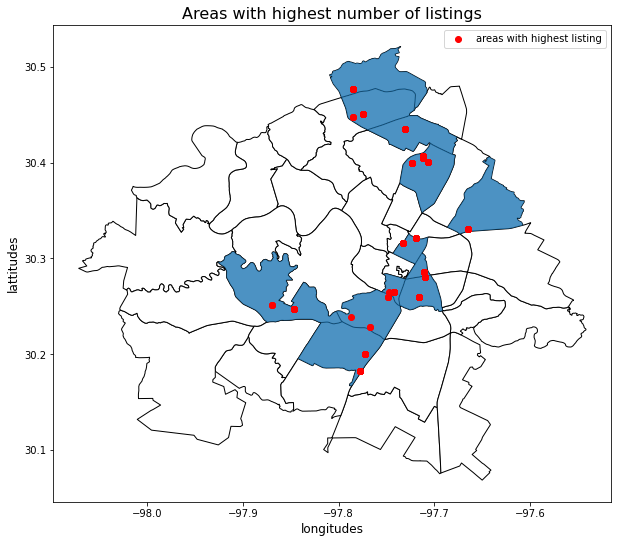

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Areas with highest number of listings", fontsize=16)
plt.xlabel('longitudes', fontsize=12)
plt.ylabel('lattitudes', fontsize=12)

neighbourhood.plot(ax=ax, color='white', edgecolor='black')
neighbour_df.plot(ax=ax, alpha = 0.8, label = 'neighbors having highest listing')
points_df.plot(ax=ax, color = 'r', label = 'areas with highest listing')
plt.legend(loc=0)
plt.show()

## Task 2: Thematic map of neighborhood, broken down by single room, entire home.

The number of a particular type of rooms per neighbourhood is calculated and a thematic map is plotted accordingly

###Entire home/apt




In [ ]:
df1 = listing[listing['room_type'] == 'Entire home/apt'][['neighbourhood','room_type']].reset_index()
series1 = df1['neighbourhood'].value_counts()

In [ ]:
for i in neighbourhood.index:
  for j in series1.index:
    if (neighbourhood['neighbourhood'][i] == str(j)):
      neighbourhood.loc[i,'entire_home_count'] = series1[j]
neighbourhood.head()

,neighbourhood,neighbourhood_group,geometry,entire_home_count
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",19.0
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",49.0
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",41.0
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",89.0
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",98.0


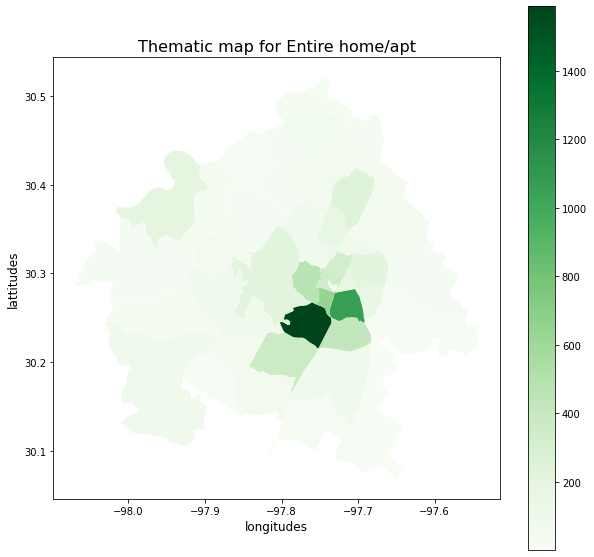

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Thematic map for Entire home/apt", fontsize=16)
plt.xlabel('longitudes', fontsize=12)
plt.ylabel('lattitudes', fontsize=12)

neighbourhood.plot(column='entire_home_count', ax=ax, legend=True,cmap='Greens')

###Private room



In [ ]:
df2 = listing[listing['room_type'] == 'Private room'][['neighbourhood','room_type']].reset_index()
series2 = df2['neighbourhood'].value_counts()

In [ ]:
for i in neighbourhood.index:
  for j in series2.index:
    if (neighbourhood['neighbourhood'][i] == str(j)):
      neighbourhood.loc[i,'private_room_count'] = series2[j]
neighbourhood.head()

,neighbourhood,neighbourhood_group,geometry,entire_home_count,private_room_count
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",19.0,6.0
1,78754,None,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ...",49.0,57.0
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",41.0,6.0
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",89.0,8.0
4,78756,None,"MULTIPOLYGON (((-97.72792 30.32906, -97.72760 ...",98.0,21.0


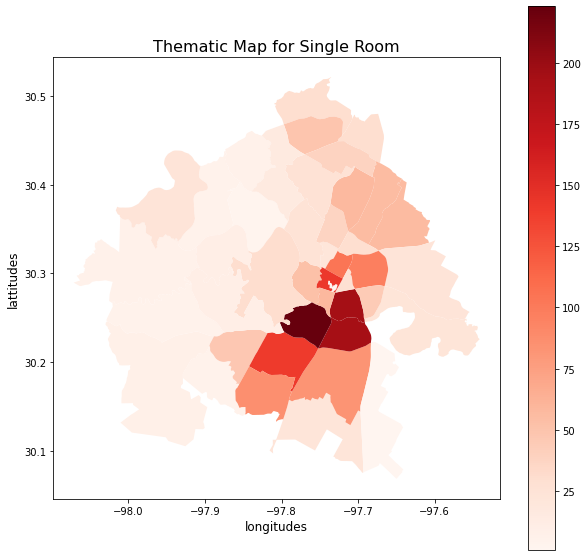

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Thematic Map for Single Room", fontsize=16)
plt.xlabel('longitudes', fontsize=12)
plt.ylabel('lattitudes', fontsize=12)

neighbourhood.plot(column='private_room_count', ax=ax, legend=True,cmap='Reds')

## Task 3: Top 10 hosts by total number of listings

The task at hand is to find the top 10 hosts who has highest number of listings. The data is segregated based on the host name and host ID and required solution is obtained.

In [ ]:
top10 = listing.groupby(by = ['host_id','host_name']).sum('calculated_host_listings_count').sort_values(by = 'calculated_host_listings_count', ascending = False).reset_index()
top10 = top10[['host_id','host_name','calculated_host_listings_count']][:10]
top10

,host_id,host_name,calculated_host_listings_count
0,359036978,Kia,128164
1,104309976,WanderJaunt,17161
2,109638288,TurnKey Vacation Rentals,6724
3,8167447,Martin,6561
4,118565935,Renters Club,3136
5,346827202,Madalynn,2304
6,194953121,Christian,2025
7,210733801,Above,1849
8,368944610,Kia,1600
9,124060715,Evolve Vacation Rental,1444


##Task 4: One Metric - Neighbourhoods which are **Economical**

The task in hand is to find a neighbourhood whose mean price for the stay is reasonable. The metrics used are price and minimum nights. A new metric is introduced "minimum price for stay" which is essentially the product of price per night and minimum number of nights required to stay.

The following is the analysis for the data corresponding to Entire Home/apt and Private Room.

###Entire Home/apt

In [ ]:
entireHome = listing[listing['room_type']=='Entire home/apt']
entireHome['minimum_price for stay'] = entireHome['minimum_nights']*entireHome['price']
entireHome = entireHome.groupby(by='neighbourhood').mean('minimum_price for stay')['minimum_price for stay'].sort_values()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mean = entireHome.mean()
sd = np.sqrt(entireHome.var())
median = entireHome.median()
print('mean = ',mean,'\nmedian = ',median,'\nstandard deviation = ',sd)

mean =  4409.839655584512 
median =  1406.8863636363635 
standard deviation =  10138.874286493325


From the above mentioned statistics, we can see that the histogram of the minimum price for stay data would be left skewed and hence **median** would give us the neighbourhood having the houses which have the most economical price for the stay.

In [ ]:
for i in neighbourhood.index:
  for j in entireHome.index:
    if (neighbourhood['neighbourhood'][i] == str(j)):
      neighbourhood.loc[i,'price_for_stay_home'] = entireHome[j]

The following are the neighbourhoods which are around the median for entire home/apt:

In [ ]:
m1 = (len(neighbourhood['neighbourhood'])//2)-2
m2 = (len(neighbourhood['neighbourhood'])//2)+2
print('The neighbourhoods around the median have the index ranging from',m1,'and',m2)

The neighbourhoods around the median have the index ranging from 20 and 24


In [ ]:
neighbourhood_entireHome = neighbourhood[['price_for_stay_home','neighbourhood','geometry']].sort_values(by='price_for_stay_home')
neighbourhood_entireHome = neighbourhood_entireHome.reset_index(drop=True)
neighbourhood_entireHome = neighbourhood_entireHome[['price_for_stay_home','neighbourhood','geometry']][m1:m2]
neighbourhood_entireHome

,price_for_stay_home,neighbourhood,geometry
20,1342.910448,78751,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ..."
21,1390.000000,78757,"MULTIPOLYGON (((-97.73600 30.37857, -97.73356 ..."
22,1423.772727,78744,"MULTIPOLYGON (((-97.68335 30.21432, -97.68331 ..."
23,1442.959184,78754,"MULTIPOLYGON (((-97.63658 30.40266, -97.63754 ..."


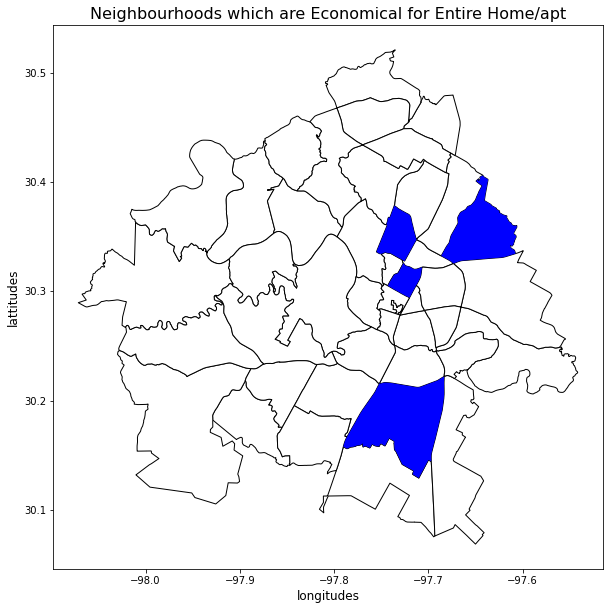

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Neighbourhoods which are Economical for Entire Home/apt", fontsize=16)
plt.xlabel('longitudes', fontsize=12)
plt.ylabel('lattitudes', fontsize=12)
neighbourhood.plot(ax=ax, legend=True,color='white',edgecolor='black')
neighbourhood_entireHome.plot(ax=ax, legend=True,color='blue')

###Private Room

Let us now look at the same for in the case of a Private Room.

In [ ]:
privateRoom = listing[listing['room_type']=='Private room']
privateRoom = privateRoom.reset_index(drop=True)
for i in range(len(privateRoom)):
  privateRoom.loc[i,'minimum_price for stay'] = privateRoom.loc[i,'minimum_nights']*privateRoom.loc[i,'price']
privateRoom = privateRoom.groupby(by='neighbourhood').mean('minimum_price for stay')['minimum_price for stay'].sort_values()

In [ ]:
mean = privateRoom.mean()
sd = np.sqrt(privateRoom.var())
median = privateRoom.median()
print('mean = ',mean,'\nmedian = ',median,'\nstandard deviation = ',sd)

mean =  562.7356971445066 
median =  310.5 
standard deviation =  856.6162545229874


From the above statistics, we can see that here too it is left skewed and hence **median** would give us the required solution.

In [ ]:
for i in neighbourhood.index:
  for j in privateRoom.index:
    if (neighbourhood['neighbourhood'][i] == str(j)):
      neighbourhood.loc[i,'price_for_stay_private'] = privateRoom[j]

The following are the neighbourhoods which are around the median for private home:

In [ ]:
neighbourhood = neighbourhood[['price_for_stay_private','neighbourhood','geometry']].sort_values(by='price_for_stay_private')
neighbourhood = neighbourhood.reset_index(drop=True)
neighbourhood_privateRoom = neighbourhood[['price_for_stay_private','neighbourhood','geometry']][m1:m2]
neighbourhood_privateRoom

,price_for_stay_private,neighbourhood,geometry
20,292.487179,78727,"MULTIPOLYGON (((-97.69729 30.44004, -97.69676 ..."
21,310.500000,78732,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ..."
22,343.291667,78734,"MULTIPOLYGON (((-97.92086 30.43496, -97.92067 ..."
23,347.441860,78748,"MULTIPOLYGON (((-97.83150 30.19000, -97.82750 ..."


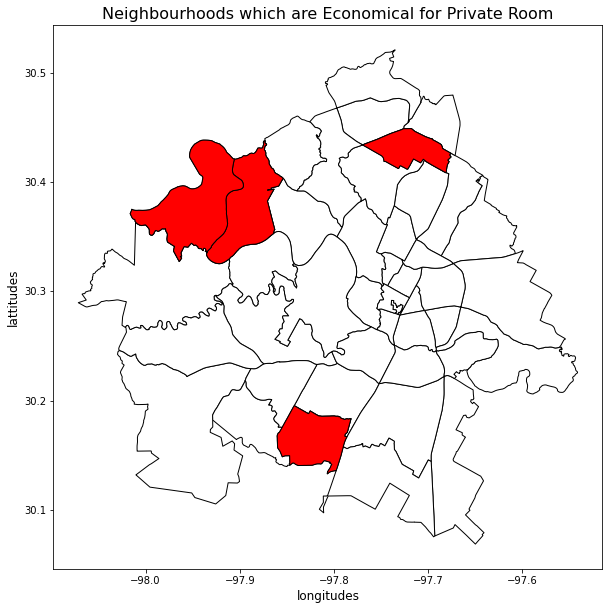

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
plt.title("Neighbourhoods which are Economical for Private Room", fontsize=16)
plt.xlabel('longitudes', fontsize=12)
plt.ylabel('lattitudes', fontsize=12)
neighbourhood.plot(ax=ax, legend=True,color='white',edgecolor='black')
neighbourhood_privateRoom.plot(ax=ax, legend=True,color='red',edgecolor='black')

Thus, if a middle class person wants to book an entire home/apt or a private room, he could start with the **neighbours obtained** and select accordingly.